<a href="https://colab.research.google.com/github/JSEFERINO/C_Datos/blob/main/16_C_Datos_KNN_y_otros_metodos_de_imputar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio a la Ciencia de Datos por Julio Hurtado Márquez**
## **Parte V**
# **77. Data Mining - KNN y otros métodos**

# **a. KNNimputer**
+ **KNNimputer es una clase de _scikit-learn_ que se usa para completar o predecir los valores que faltan en un conjunto de datos.** 

+ **Es un método más útil que funciona con el enfoque básico del algoritmo KNN en lugar del enfoque ingenuo de llenar todos los valores con la media o la mediana. En este enfoque, especificamos una distancia desde los valores faltantes que también se conoce como el parámetro _K_.** 
+ **El valor faltante se predecirá con referencia a la media de los vecinos mas cercanos en el DataSet de Entrenamiento.**

+ **Se implementa mediante el método KNNimputer() que contiene los siguientes argumentos:**

+ + _n_vecinos_: número de puntos de datos para incluir más cerca del valor faltante.
+ + _métrica_: la métrica de distancia que se utilizará para la búsqueda.
+ + _valores_ _{nan_euclidean. invocable}_ por defecto _pesos nan_euclidianos_
: para determinar sobre qué base deben ser tratados los valores vecinos
valores -{uniforme, distancia, invocable} por defecto- uniforme.

## **b. Nuestras librerias.**

In [ ]:
## ** b. Nuestras librerias.**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **c. Un Ejemplo ilustrativo**
+ **Tomemos una Matriz $4x3$**
- $$X_{train}=\begin{pmatrix} 1&2&np.nan\\ 3&4&3\\ np.nan&6&5\\ 8&8&7\\ \end{pmatrix}$$
+ Para la columna 1 - kNN = 2  

| Data | Puntos| distancia Respecto a [6]| cercano|                       
|:--:|:--:|:--:| :--:| 
| [1 2] |    [2] |  4 |NO|
| [3 4] |    [4]|   2| SI|
| [8 8] |    [8] |  2 |SI |  
|  ||  (3+8)/2=5.5 |  | 


+ Para la columna 2 - kNN = 2  

| Data | Puntos| distancia Respecto a [2]| cercano|                       
|:--:|:--:|:--:| :--:| 
| [4 3] |    [4] |  2 |SI|
| [6 5] |    [6]|   4| SI|
| [8 7] |    [8] |  6 |NO |  
|  ||  (3+5)/2=4.0 |  | 



# **d. Definimos la matriz de entrenamiento**

In [ ]:
# **d. Definimos la matriz de entrenamiento**
X_train = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
X_train

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

In [ ]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


# **e. Definimos el onjeto a usar para la imputación**

In [ ]:
# **e. Definimos el onjeto a usar para la imputación y corroboramos que funciona**
from sklearn.impute import KNNImputer # Este es el objeto que utilizaremos para realizar la imputación
knnImpute1 = KNNImputer( # creamos una instancia del objeto
                        missing_values=np.nan, # es la forma como se llaman los faltantes en la data
                        n_neighbors=2, # cantidad de vecinos mas cercanos para completar la imputación
                        weights="uniform", # por defecto 'uniform' : todos los valores pesan lo mismo o una ponderación por la distancia
                        metric="nan_euclidean")
knnImpute1.fit(X_train) # El metodo fit se entrena con la matriz
Xtrans1 =knnImpute1.transform(X_train) # para aplicarlo sobre la matriz que se desea imputar
Xtrans1

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
Xtrans1 = pd.DataFrame(Xtrans1)
Xtrans1

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


## **f. El DataFrame de la Base de datos con la cual vamos a trabajar**

In [ ]:
## **f. El DataFrame de la Base de datos con la cual vamos a trabajar**
data=pd.read_csv("/content/student-mat.csv",delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## **g. Que tipos de datos tiene la base de datos a trabajar**

- Predecir el rendimiento de los estudiantes en la educación secundaria (bachillerato).

|Características del conjunto de datos|multivariado|
|:--:|:--:|
|Área temática|Social|
|Tareas asociadas|Clasificación, Regresión|
|Tipo de atributo|Entero|
|Instancias|395|
|Atributos|33|

## **h. Tipos de variables de nuestro DataFrame**

In [ ]:
## **h. Tipos de variables de nuestro DataFrame**
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# **78. Trabajando con nuestra base de Datos**

#**a. Vamos a seleccionar solo los datos numericos de nuestra base de datos**

In [ ]:
#**a. Vamos a seleccionar solo los datos numericos de nuestra base de datos**
data0 = data.select_dtypes(include='int64')
data0
data1 = data0.copy()

## **b. Ahora guardemos la data original en una copia**

In [ ]:
## **b. Ahora guardemos la data original en una copia**
data_ori = data
data_ori.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# **79. Cómo encontrar valores NaN en un DataFrame y modificarlos**

- Cuando trabajamos con un DataFrame, especialmente si es extenso, podemos tener problemas con lo valores NaN. 
- Los NaN (“Not a Number“) son valores vacíos no computables que debemos tratar en nuestros conjuntos de datos antes de trabajar con ellos.
- Veremos algunos códigos de Python que pueden ayudarnos a trabajar con los NaN.
- Este código nos devolverá True si hay algún valor NaN en nuestro DataFrame.

## **a. Será que nuestra base de datos tiene datos perdidos**

In [ ]:
## **a. Será que nuestra base de datos tiene datos perdidos**
data.isnull().values.any()

False

## **b. ¿Cuántos NaN hay?**

In [ ]:
## **b. ¿Cuántos NaN hay?**
data[data.isna().any(axis=1)] # Ninguno

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## **c. Colocaremos la mayor cantidad de NaN excepto en las tres últimas columnas de la data1**

In [ ]:
## **c. Colocaremos la mayor cantidad de NaN excepto en las tres últimas columnas de la data1**
length = len(data1) # En toda la longitud de la base de datos
for i in data1.columns[:-3]: # Para cualquier columna desde la primera hasta la antepenultima
    num = int(np.random.randint(0,90)/100*length) #Colocaremos un número aleatorio de la dist uniforme entre 0 y 90 en toda 
    # la longitud
    idx_replace = np.random.randint(0, length-1, num) # despues a ese numero lo reemplazamos por cero
    data1.loc[idx_replace, i] = np.nan # al final lo reemplazamos pon NaN

## **d. Será que nuestra base de datos tiene datos perdidos**

In [ ]:
## **d. Será que nuestra base de datos tiene datos perdidos**
data1.isnull().values.any()

True

## **e. ¿En dónde estan los NaN ahora?**

In [ ]:
## **e. ¿En dónde estan los NaN ahora?**
data1[data1.isna().any(axis=1)] # Ninguno

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,1.0,3.0,NaN,5,6,6
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,1.0,3.0,4.0,5,5,6
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,3.0,NaN,NaN,7,8,10
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,15,14,15
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,2.0,5.0,NaN,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18.0,NaN,1.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,0.0,6,5,0
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,5.0,4.0,NaN,9,9,9
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,4.0,NaN,3.0,14,16,16
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,3.0,NaN,NaN,10,8,7


##**f. Por variables cuantos NaN hay**

In [ ]:
##**f. Por variables cuantos NaN hay**
data1.isnull().sum()

age            26
Medu          102
Fedu           41
traveltime    139
studytime     159
failures      227
famrel        223
freetime       46
goout         142
Dalc          185
Walc           26
health        177
absences      215
G1              0
G2              0
G3              0
dtype: int64

# **80. Siempre es bueno tener claro nuestra base de datos para saber conque valores se va a imputar**


- 1 school  - escuela de estudiantes (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
- 2 sex - sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)
- 3 age  - edad del estudiante (numérico: de 15 a 22)
- 4 address  - tipo de domicilio del estudiante (binario: 'U' - urbano o 'R' - rural)
- 5 famsize - tamaño de familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor a 3)
- 6 Pstatus - estado de convivencia de los padres (binario: 'T' - viviendo juntos o 'A' - separados)
- 7 Medu - educación de la madre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)
- 8 Fedu - educación del padre (numérico: 0 - ninguno, 1 - educación primaria (4° grado), 2 – 5° a 9° grado, 3 – educación secundaria o 4 – educación superior)
- 9 Mjob - trabajo de la madre (nominal: 'maestra', 'salud' relacionado con la atención, 'servicios' civiles (por ejemplo, administrativo o policía), 'en_casa' u 'otro')
- 10 Fjob - trabajo del padre (nominal: 'maestro', 'salud' relacionado con la atención, 'servicios' civiles (por ejemplo, administrativo o policía), 'en_casa' u 'otro')
- 11 reason  - razón para elegir esta escuela (nominal: cerca de 'casa', 'reputación' de la escuela, preferencia de 'curso' u 'otro')
- 12 tutor - tutor del estudiante (nominal: 'madre', 'padre' u 'otro')
- 13 traveltime - tiempo de viaje de casa a la escuela (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
- 14 studytime  - tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
- 15 failures  - número de fallas de clase pasadas (numérico: n si 1<=n<3, si no 4)
- 16 schoolsup  - apoyo educativo extra (binario: si o no)
- 17 famsup - apoyo educativo familiar (binario: si o no)
- 18 paid  pagas extra pagadas dentro de la materia del curso (matemáticas o portugués) (binario: sí o no)
- 19 activities  - actividades extraescolares (binario: sí o no)
- 20 nursery  - parvulario asistido (binario: sí o no)
- 21 higher  - quiere cursar estudios superiores (binario: sí o no)
- 22 internet - Acceso a internet en casa (binario: si o no)
- 23 romantic  - con una relación romántica (binario: sí o no)
- 24 famrel - calidad de las relaciones familiares (numérico: de 1 - muy mala a 5 excelente)
- 25 freetime  - tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
- 26 goout - salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)
- 27 Dalc - consumo de alcohol en jornada laboral (numérico: de 1 - muy bajo a 5 - muy alto)
- 28 Walc - consumo de alcohol en fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
- 29 health  - estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
- 30 absences  - número de ausencias escolares (numérico: de 0 a 93)

## **Estas calificaciones están relacionadas con la materia del curso, Matemáticas o Portugués:**

- 31 G1 - nota del primer período (numérico: de 0 a 20)
- 31 G2 - nota del segundo período (numérico: de 0 a 20)
- 32 G3 - nota final (numérico: de 0 a 20, objetivo de salida)

In [ ]:
## **a. Recordemos nuevamente nuestras columnas**
data1.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

##**81. Clasificar con K-Nearest-Neighbor**
- **Aplicamos lo aprendido arriba**

# **a. Definimos nuestro objeto de imputación**

In [ ]:
# **a. Definimos nuestro objeto de imputación**
from sklearn.impute import KNNImputer 
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean') # Los cinco vecinos mas cercano
# fit on the dataset
imputer.fit(data1) # Entrenamos el imputador
# Y lo aplicamos al DataSet que vamos a imputar
Xtrans = imputer.transform(data1)

# **b. Nuestra matriz con los datos imputados**

In [ ]:
# **b. NUestra matriz con los datos imputados**
Xtrans

array([[18. ,  3.2,  2.4, ...,  5. ,  6. ,  6. ],
       [17. ,  1. ,  1. , ...,  5. ,  5. ,  6. ],
       [15. ,  1. ,  1. , ...,  7. ,  8. , 10. ],
       ...,
       [21. ,  2.8,  1. , ..., 10. ,  8. ,  7. ],
       [18. ,  3. ,  2. , ..., 11. , 12. , 10. ],
       [19. ,  1. ,  1. , ...,  8. ,  9. ,  9. ]])

# **c. Recordemos nuestro DataFrame sin imputar**

In [ ]:
# **c. Recordemos nuestro DataFrame sin imputar**
data1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,1.0,3.0,NaN,5,6,6
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,1.0,3.0,4.0,5,5,6
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,3.0,NaN,NaN,7,8,10
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,15,14,15
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,2.0,5.0,NaN,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,5.0,4.0,NaN,9,9,9
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,4.0,NaN,3.0,14,16,16
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,3.0,NaN,NaN,10,8,7
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,NaN,NaN,4.0,5.0,0.0,11,12,10


# **d. Ahora veamos nuestro DataFrame imputado como la matriz de transformación**

In [ ]:
# **d. Ahora veamos nuestro DataFrame imputado como la matriz de transformación**
Xtrans=pd.DataFrame(Xtrans,columns=data1.columns)
Xtrans

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,3.2,2.4,2.0,2.0,0.2,4.0,3.0,4.0,1.2,1.0,3.0,8.8,5.0,6.0,6.0
1,17.0,1.0,1.0,1.6,2.2,0.0,5.0,3.4,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,15.0,1.0,1.0,1.0,2.0,0.2,4.0,3.0,2.0,1.2,3.0,3.8,7.8,7.0,8.0,10.0
3,15.0,4.0,2.0,1.2,3.0,0.0,3.0,2.0,2.6,1.0,1.0,4.0,3.2,15.0,14.0,15.0
4,16.0,3.0,3.0,1.0,1.6,0.0,3.8,3.0,2.6,1.0,2.0,5.0,9.8,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.8,2.4,1.2,2.0,0.6,4.4,5.0,4.0,4.0,5.0,4.0,8.0,9.0,9.0,9.0
391,17.0,3.0,1.0,2.0,2.0,0.0,2.0,4.0,2.8,1.8,4.0,3.4,3.0,14.0,16.0,16.0
392,21.0,2.8,1.0,1.0,1.0,3.0,4.4,5.0,3.0,3.0,3.0,3.4,10.6,10.0,8.0,7.0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,3.4,2.0,4.0,5.0,0.0,11.0,12.0,10.0


# **82. Otros métodos de imputar - _media_moda_mediana_**

-  **Podemos definir oras formas para imputar**

# **a. Definimos una función donde ingresemos tres argumentos: media, median y moda**

In [ ]:
# **a. Definimos una función donde ingresemos tres argumentos: media, median y moda**
def impute_nan_meanmedian(df, variable, value): # definimos una función donde ingresemos tres argumentos:
  # el DataFrame, la variable a imputar y el valor con el que se va a reemplazar los datos perdidos
    if value=="median": #Con el condicional if, si ese valor es la mediana
         val=df[variable].median() # que calcule la mediana de la variable y la guarde su valor
    if value=="mean": # Si ese valor es la media, que la calcule y la guarde
         val=df[variable].mean()
    if value=="mode": # Si ese valor es la media, que la calcule y la guarde
         val=df[variable].mode()
    df[variable+"_"+value]=df[variable].fillna(val) # En el DataFrame cree una nueva columna donde en la variable se reemplace NaN el valor guardado
    return df # Que me retorne la nueva versión del DataFrame

##**b. Definamos una segunda función que nos permita  imputar con un valor aleatorio**

In [ ]:
##**b. Definamos una segunda función que nos permita  imputar con un valor aleatorio**
import random # Colocaremos un valor aleatorio
def rand_float_range(start, end): #La función tendrá dos argumentos: inicio y fin
    return random.random() * (end - start) + start # al valor aleatorio lo multiplicamos por la diferencia y le sumamos el inicio

def impute_nan_random(df, variable, value=-9): # definimos una función donde ingresemos tres argumentos:
  # el DataFrame, la variable a imputar y el valor con el que se va a reemplazar los datos perdidos
    if value!=-9: # si el valor es diferente de 9
        df[variable+"_random_fixed"]=df[variable].fillna(value) # Ese valor se remplaza por el NaN en la Variable y crea una nueva variable en el DataFrame
    else:
        start,end=df[variable].min(),df[variable].max() # Si es igual a -9 hace la funció arriba
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df

# **c. Aplicamos la funcion definida arriba para imputar la variable "goout" con la media**

In [ ]:
# **c. Aplicamos la funcion definida arriba para imputar la variable "goout" con la media**
impute_nan_meanmedian(data1,"goout","mean")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_mean
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,1.0,3.0,NaN,5,6,6,4.000000
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,1.0,3.0,4.0,5,5,6,3.000000
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,3.0,NaN,NaN,7,8,10,2.000000
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,15,14,15,3.197628
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,2.0,5.0,NaN,6,10,10,3.197628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,5.0,4.0,NaN,9,9,9,4.000000
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,4.0,NaN,3.0,14,16,16,3.197628
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,3.0,NaN,NaN,10,8,7,3.000000
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,NaN,NaN,4.0,5.0,0.0,11,12,10,3.197628


# **d. Aplicamos la funcion definida arriba para imputar la variable "goout" con un valor aleatorio entre el máximo y el mínimo**

In [ ]:
# **d. Aplicamos la funcion definida arriba para imputar la variable "goout" con un valor alaeatorio entre el máximo y el mínimo**
impute_nan_random(data1, "goout", value=-9)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_mean,goout_random
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,1.0,3.0,NaN,5,6,6,4.000000,4.000000
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,1.0,3.0,4.0,5,5,6,3.000000,3.000000
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,3.0,NaN,NaN,7,8,10,2.000000,2.000000
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,15,14,15,3.197628,4.235011
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,2.0,5.0,NaN,6,10,10,3.197628,4.235011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,5.0,4.0,NaN,9,9,9,4.000000,4.000000
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,4.0,NaN,3.0,14,16,16,3.197628,4.235011
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,3.0,NaN,NaN,10,8,7,3.000000,3.000000
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,NaN,NaN,4.0,5.0,0.0,11,12,10,3.197628,4.235011


# **e. Aplicamos la funcion definida arriba para imputar la variable "goout" con un valor aleatorio entre fijo**

In [ ]:
# **e. Aplicamos la funcion definida arriba para imputar la variable "goout" con un valor aleatorio entre fijo**
impute_nan_random(data1, "goout", value=-5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_mean,goout_random,goout_random_fixed
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,1.0,3.0,NaN,5,6,6,4.000000,4.000000,4.0
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,1.0,3.0,4.0,5,5,6,3.000000,3.000000,3.0
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,3.0,NaN,NaN,7,8,10,2.000000,2.000000,2.0
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,15,14,15,3.197628,4.235011,-5.0
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,2.0,5.0,NaN,6,10,10,3.197628,4.235011,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,5.0,4.0,NaN,9,9,9,4.000000,4.000000,4.0
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,4.0,NaN,3.0,14,16,16,3.197628,4.235011,-5.0
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,3.0,NaN,NaN,10,8,7,3.000000,3.000000,3.0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,NaN,NaN,4.0,5.0,0.0,11,12,10,3.197628,4.235011,-5.0


# **83. Comparar los diferentes métodos de imputación**

# **a. Algunos graficos para comparar los metodos de imputación para la variable "goout**

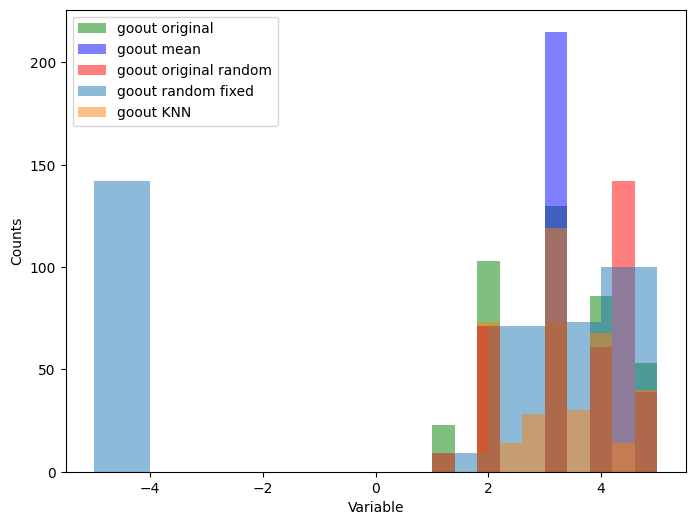

In [ ]:
# **a. Algunos graficos para comparar los metodos de imputación para la variable "goout**
plt.figure(figsize=(8,6))
bins=10
plt.hist(data0["goout"],bins=bins,alpha=0.5,label="goout original", color = "green")
plt.hist(data1["goout_mean"],bins=bins,alpha=0.5,label="goout mean", color = "blue")
plt.hist(data1["goout_random"],bins=bins,alpha=0.5,label="goout original random", color = "red")
plt.hist(data1["goout_random_fixed"],bins=bins,alpha=0.5,label="goout random fixed")
plt.hist(Xtrans["goout"],bins=bins,alpha=0.5,label="goout KNN")
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.legend()
plt.show()


# **b. Algunos graficos para comparar los metodos de imputación para la variable "age"**

In [ ]:
# **b. Algunos graficos para comparar los metodos de imputación para la variable "age"**
impute_nan_random(data1,"age",18)
impute_nan_random(data1,"age",-9)
impute_nan_meanmedian(data1,"age","mean")
impute_nan_meanmedian(data1,"age","median")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,G1,G2,G3,goout_mean,goout_random,goout_random_fixed,age_random_fixed,age_random,age_mean,age_median
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,...,5,6,6,4.000000,4.000000,4.0,18.0,18.0,18.0,18.0
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,...,5,5,6,3.000000,3.000000,3.0,17.0,17.0,17.0,17.0
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,...,7,8,10,2.000000,2.000000,2.0,15.0,15.0,15.0,15.0
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,...,15,14,15,3.197628,4.235011,-5.0,15.0,15.0,15.0,15.0
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,...,6,10,10,3.197628,4.235011,-5.0,16.0,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,...,9,9,9,4.000000,4.000000,4.0,20.0,20.0,20.0,20.0
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,...,14,16,16,3.197628,4.235011,-5.0,17.0,17.0,17.0,17.0
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,...,10,8,7,3.000000,3.000000,3.0,21.0,21.0,21.0,21.0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,NaN,NaN,...,11,12,10,3.197628,4.235011,-5.0,18.0,18.0,18.0,18.0


# **c. Algunos graficos para comparar los metodos de imputación para la variable "age"**

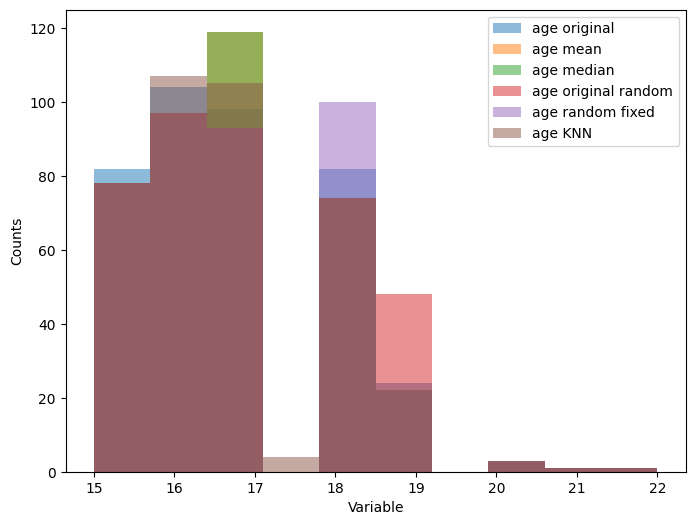

In [ ]:
# **c. Algunos graficos para comparar los metodos de imputación para la variable "age"**
plt.figure(figsize=(8,6))
bins=10
plt.hist(data0["age"],bins=bins,alpha=0.5,label="age original")
plt.hist(data1["age_mean"],bins=bins,alpha=0.5,label="age mean")
plt.hist(data1["age_median"],bins=bins,alpha=0.5,label="age median")
plt.hist(data1["age_random"],bins=bins,alpha=0.5,label="age original random")
plt.hist(data1["age_random_fixed"],bins=bins,alpha=0.5,label="age random fixed")
plt.hist(Xtrans["age"],bins=bins,alpha=0.5,label="age KNN")
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.legend()
plt.show()

# **d. Algunos graficos para comparar los metodos de imputación para la variable "studytime"**

In [ ]:
# **d. Algunos graficos para comparar los metodos de imputación para la variable "studytime"**
impute_nan_random(data1,"studytime",3)
impute_nan_random(data1,"studytime",-9)
impute_nan_meanmedian(data1,"studytime","mean")
impute_nan_meanmedian(data1,"studytime","median")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,goout_random,goout_random_fixed,age_random_fixed,age_random,age_mean,age_median,studytime_random_fixed,studytime_random,studytime_mean,studytime_median
0,18.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,...,4.000000,4.0,18.0,18.0,18.0,18.0,2.0,2.000000,2.000000,2.0
1,17.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,3.0,1.0,...,3.000000,3.0,17.0,17.0,17.0,17.0,3.0,2.417447,2.055085,2.0
2,15.0,1.0,1.0,1.0,2.0,NaN,4.0,3.0,2.0,NaN,...,2.000000,2.0,15.0,15.0,15.0,15.0,2.0,2.000000,2.000000,2.0
3,15.0,4.0,2.0,NaN,3.0,NaN,3.0,2.0,NaN,1.0,...,4.235011,-5.0,15.0,15.0,15.0,15.0,3.0,3.000000,3.000000,3.0
4,16.0,3.0,3.0,1.0,NaN,0.0,NaN,3.0,NaN,1.0,...,4.235011,-5.0,16.0,16.0,16.0,16.0,3.0,2.417447,2.055085,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,4.0,4.0,...,4.000000,4.0,20.0,20.0,20.0,20.0,2.0,2.000000,2.000000,2.0
391,17.0,3.0,1.0,2.0,NaN,NaN,2.0,4.0,NaN,NaN,...,4.235011,-5.0,17.0,17.0,17.0,17.0,3.0,2.417447,2.055085,2.0
392,21.0,NaN,1.0,1.0,1.0,3.0,NaN,5.0,3.0,3.0,...,3.000000,3.0,21.0,21.0,21.0,21.0,1.0,1.000000,1.000000,1.0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,NaN,NaN,...,4.235011,-5.0,18.0,18.0,18.0,18.0,1.0,1.000000,1.000000,1.0


# **e. Algunos graficos para comparar los metodos de imputación para la variable "studytime"**

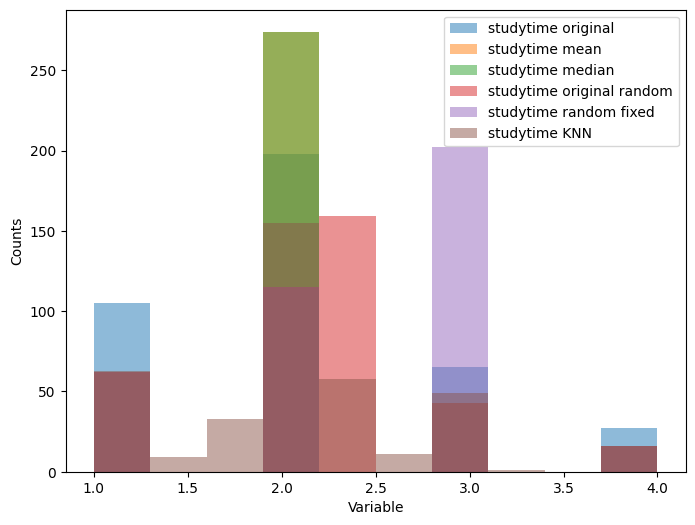

In [ ]:
# **e. Algunos graficos para comparar los metodos de imputación para la variable "studytime"**
plt.figure(figsize=(8,6))
bins=10
plt.hist(data0["studytime"],bins=bins,alpha=0.5,label="studytime original")
plt.hist(data1["studytime_mean"],bins=bins,alpha=0.5,label="studytime mean")
plt.hist(data1["studytime_median"],bins=bins,alpha=0.5,label="studytime median")
plt.hist(data1["studytime_random"],bins=bins,alpha=0.5,label="studytime original random")
plt.hist(data1["studytime_random_fixed"],bins=bins,alpha=0.5,label="studytime random fixed")
plt.hist(Xtrans["studytime"],bins=bins,alpha=0.5,label="studytime KNN")
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.legend()
plt.show()

#**84. Valores atípicos**

+ Un valor atípico es una observación que se encuentra a una distancia anormal de otros valores en una muestra aleatoria de una población. En cierto sentido, esta definición deja que el analista (o un proceso de consenso) decida qué se considerará anormal. Antes de que se puedan señalar las observaciones anormales, es necesario caracterizar las observaciones normales.

# **a. Gráfico de los datos transformados con KNNImput**
- Dado la diferencia en unidades, es dificil hacer alguna inferencia

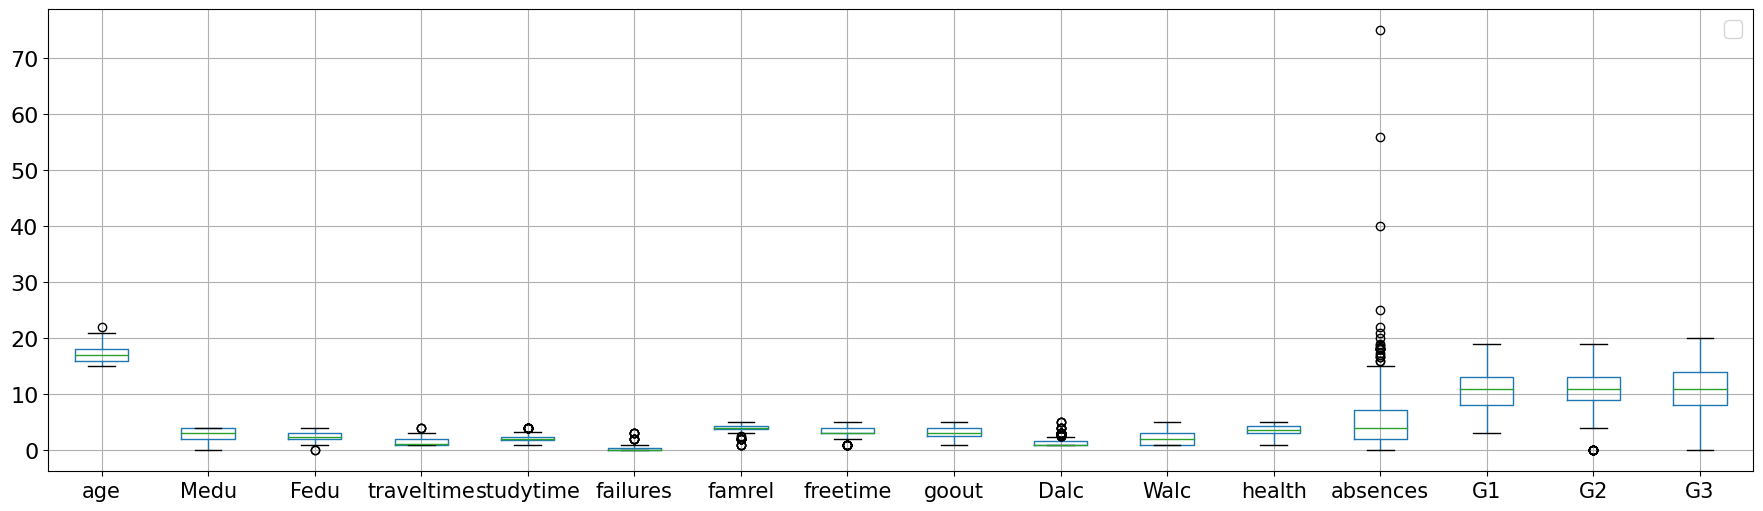

In [ ]:
# **a. Gráfico de los datos transformados con KNNImput**
plt.figure(figsize=(22,6))
Xtrans.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# **b. Vamos a escalar la data X_trans para hacerla comparable**
+ **Llevamos los datos a una misma escala**

In [ ]:
# **b. Vamos a escalar la data X_trans para hacerla comparable**
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xtrans_scale = scale.fit_transform(Xtrans)

# **c. Esta es nuestra matriz escalada**

In [ ]:
# **c. Esta es nuestra matriz escalada**
Xtrans_scale 

array([[ 1.06883622,  0.3919673 , -0.11967841, ..., -1.78246688,
        -1.25479105, -0.96493392],
       [ 0.26343693, -1.90331291, -1.47587019, ..., -1.78246688,
        -1.52097927, -0.96493392],
       [-1.34736165, -1.90331291, -1.47587019, ..., -1.1791469 ,
        -0.72241461, -0.0907392 ],
       ...,
       [ 3.48503409, -0.02535638, -1.47587019, ..., -0.27416693,
        -0.72241461, -0.74638524],
       [ 1.06883622,  0.18330546, -0.50716177, ...,  0.02749306,
         0.34233827, -0.0907392 ],
       [ 1.87423551, -1.90331291, -1.47587019, ..., -0.87748691,
        -0.45622639, -0.30928788]])

# **d. Ahora veamos nuestro DataFrame imputado como la matriz de transformación**

In [ ]:
# **d. Ahora veamos nuestro DataFrame imputado como la matriz de transformación**
Xtrans_scale=pd.DataFrame(Xtrans_scale,columns=Xtrans.columns)
Xtrans_scale

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.068836,0.391967,-0.119678,1.025037,-0.105489,-0.108626,0.027220,-0.205540,0.812213,-0.302707,-1.028370,-0.495188,0.505152,-1.782467,-1.254791,-0.964934
1,0.263437,-1.903313,-1.475870,0.294848,0.183873,-0.521195,1.480202,0.219529,-0.228748,-0.600143,-1.028370,-0.495188,-0.227087,-1.782467,-1.520979,-0.964934
2,-1.347362,-1.903313,-1.475870,-0.800435,-0.105489,-0.108626,0.027220,-0.205540,-1.269708,-0.302707,0.558373,0.218027,0.352603,-1.179147,-0.722415,-0.090739
3,-1.347362,1.226615,-0.507162,-0.435340,1.341324,-0.521195,-1.425761,-1.268212,-0.645132,-0.600143,-1.028370,0.396331,-0.349127,1.234133,0.874715,1.002004
4,-0.541962,0.183305,0.461547,-0.800435,-0.684214,-0.521195,-0.263376,-0.205540,-0.645132,-0.600143,-0.234999,1.287851,0.657702,-1.480807,-0.190038,-0.090739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.679635,-0.025356,-0.119678,-0.435340,-0.105489,0.716512,0.608413,1.919805,0.812213,3.861400,2.145115,0.396331,0.383113,-0.575827,-0.456226,-0.309288
391,0.263437,0.183305,-1.475870,1.025037,-0.105489,-0.521195,-2.878742,0.857132,-0.436940,0.589601,1.351744,-0.138581,-0.379637,0.932473,1.407091,1.220553
392,3.485034,-0.025356,-1.475870,-0.800435,-1.552302,5.667342,0.608413,1.919805,-0.228748,2.374219,0.558373,-0.138581,0.779742,-0.274167,-0.722415,-0.746385
393,1.068836,0.183305,-0.507162,2.850509,-1.552302,-0.521195,0.027220,0.857132,0.187636,0.887038,1.351744,1.287851,-0.837286,0.027493,0.342338,-0.090739


# **e. Ahora si tenemos un mejor gráfico de los datos**

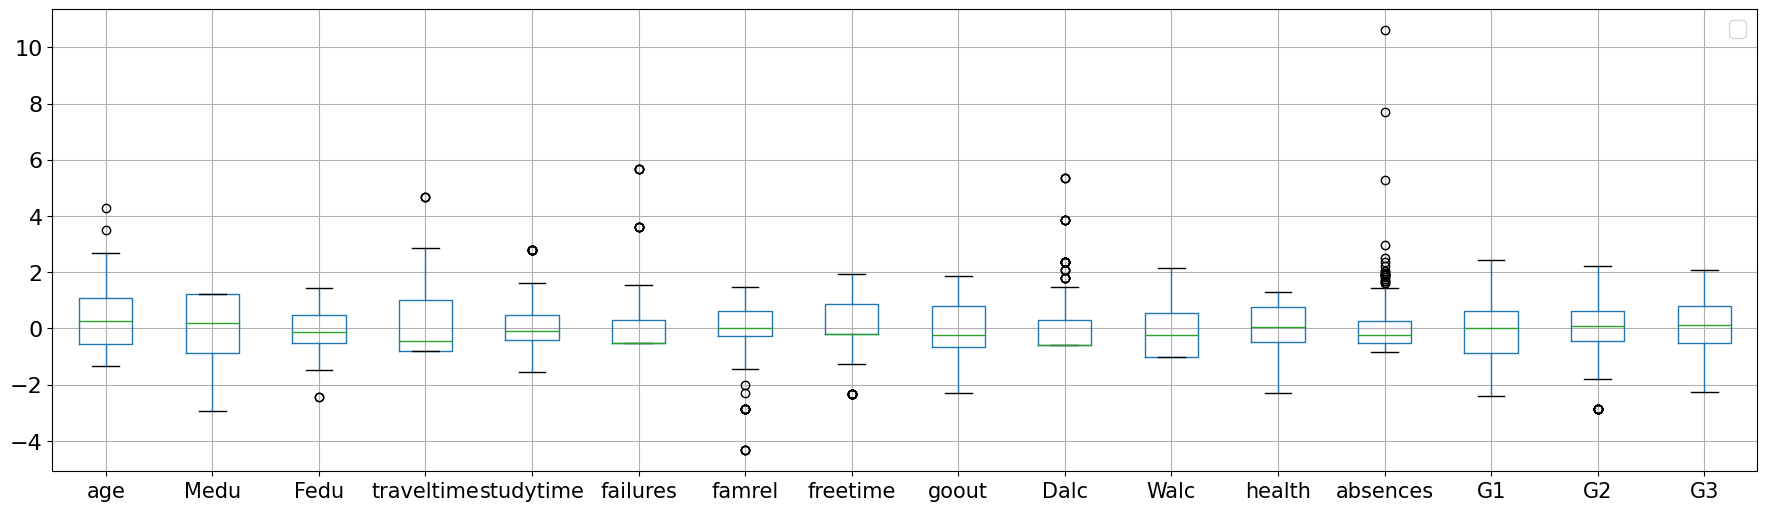

In [ ]:
# **e. Ahora si tenemos un mejor gráfico de los datos**
plt.figure(figsize=(22,6))
Xtrans_scale.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##**85. Prueba de Grubs para detectar valores atipicos en una base de Datos**

+ En estadística, la prueba de Grubbs (llamada así por Frank E. Grubbs , quien publicó la prueba en 1950 [1] ), también conocida como prueba residual normalizada máxima o prueba de desviación estudentizada extrema, es una prueba utilizada para detectar valores atípicos en un conjunto de datos univariado que se supone que proviene de una población normalmente distribuida.

+ **Definición**. La prueba de Grubbs se basa en el supuesto de normalidad. Es decir, primero se debe verificar que los datos se puedan aproximar razonablemente mediante una distribución normal antes de aplicar la prueba de Grubbs. [2]

+ La prueba de Grubbs detecta un valor atípico a la vez. Este valor atípico se elimina del conjunto de datos y la prueba se repite hasta que no se detectan valores atípicos. Sin embargo, las iteraciones múltiples cambian las probabilidades de detección, y la prueba no debe usarse para tamaños de muestra de seis o menos, ya que con frecuencia etiqueta la mayoría de los puntos como valores atípicos. [3]

+ La prueba de Grubbs se define para la hipótesis :

+ + H 0 : No hay valores atípicos en el conjunto de datos
+  + H a : Hay exactamente un valor atípico en el conjunto de datos
El estadístico de prueba de Grubbs se define como:

$$ G_{max}={\frac {\displaystyle \max _{{i=1,\ldots,N}}\left\vert Y_{i}-{\bar {Y}}\right\vert }{s}}$$

$$G>{\frac {N-1}{{\sqrt {N}}}}{\sqrt {{\frac {t_{{\alpha /(2N),N-2}}^{2}}{N -2+{t_{{\alpha /(2N),N-2}}^{2}},{N-2}}}}}$$
donde ${t_{{\alpha /(2N),N-2}}^{2}}$ denota el valor crítico superior de la distribución $t$ con $N  − 2$ grados de libertad y un nivel de significancia de $\alpha/(2 N )$.


#**a. Detectando valores atipicos para la variable "absences"**

In [ ]:
#**a. Detectando valores atipicos para la variable "absences"**
import scipy.stats as st # importando a TStudent

alpha = 0.05
cv = st.t.ppf(1-alpha/2, 6) # Valor crítico de la prueba de Grubbs
print("t_test es cv= {} para n={} observaciones con una significancia de {}".format(cv,len(Xtrans["absences"]),alpha))


t_test es = 2.4469118487916806 para n=395 observaciones con una significancia de 0.05


#**b. Detectando valores atipicos para la variable "absences" - media y desviación estandard**
- Hallamos El Estadistico de Prueba para la prueba Grubbs el maximo valor de las normalizaciones para la variable "absences"

In [ ]:
#**b. Detectando valores atipicos para la variable "absences" - media y desviación estandard**
print("La media es =",Xtrans["absences"].mean())
print("La desviación estándar es =",Xtrans["absences"].std())
# El Estadistico de Prueba para la prueba Grubbs
G=np.max(abs(Xtrans["absences"]-Xtrans["absences"].mean())/Xtrans["absences"].std())
print("El Estadistico de Prueba para la prueba Grubbs =",G)


La media es = 5.488607594936709
La desviación estándar es = 6.563546988596621
El Estadistico de Prueba para la prueba Grubbs = 10.590522552185735


#**c. Todos los valores normalizados para la variable "absences"**

In [ ]:
#**c. Todos los valores normalizados para la variable "absences"**
Gi=abs(Xtrans["absences"]-Xtrans["absences"].mean())/Xtrans["absences"].std()
Gi

0      0.504513
1      0.226799
2      0.352156
3      0.348685
4      0.656869
         ...   
390    0.382627
391    0.379156
392    0.778755
393    0.836226
394    0.074443
Name: absences, Length: 395, dtype: float64

# **d. El Valor máximo es**

In [ ]:
# **d. El Valor máximo es**
Gi.max()

10.590522552185735

# **e. El Valor máximo y la posición son**

In [ ]:
# **e. El Valor máximo y la posición son**
Gi[Gi==Gi.max()]

276    10.590523
Name: absences, dtype: float64

In [ ]:
print("El Valor máximo y la posición son ",  Gi[Gi==Gi.max()])

El Valor máximo y la posición son  276    10.590523
Name: absences, dtype: float64


# **f. Prueba de Hipotesis**

In [ ]:
# **f. Prueba de Hipotesis**
len(Xtrans["absences"])
if G>cv:
    print("El valor es un extremo")
if G<=cv:
    print("El valor NO es un extremo")

El valor es un extremo


# **g. Vamos a eliminar este valor atipico de la Data**

In [ ]:
# **g. Vamos a eliminar este valor atipico de la Data**
Xtrans2=Xtrans.drop([276],axis=0)
Xtrans2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,3.2,2.4,2.0,2.0,0.2,4.0,3.0,4.0,1.2,1.0,3.0,8.8,5.0,6.0,6.0
1,17.0,1.0,1.0,1.6,2.2,0.0,5.0,3.4,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,15.0,1.0,1.0,1.0,2.0,0.2,4.0,3.0,2.0,1.2,3.0,3.8,7.8,7.0,8.0,10.0
3,15.0,4.0,2.0,1.2,3.0,0.0,3.0,2.0,2.6,1.0,1.0,4.0,3.2,15.0,14.0,15.0
4,16.0,3.0,3.0,1.0,1.6,0.0,3.8,3.0,2.6,1.0,2.0,5.0,9.8,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.8,2.4,1.2,2.0,0.6,4.4,5.0,4.0,4.0,5.0,4.0,8.0,9.0,9.0,9.0
391,17.0,3.0,1.0,2.0,2.0,0.0,2.0,4.0,2.8,1.8,4.0,3.4,3.0,14.0,16.0,16.0
392,21.0,2.8,1.0,1.0,1.0,3.0,4.4,5.0,3.0,3.0,3.0,3.4,10.6,10.0,8.0,7.0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,3.4,2.0,4.0,5.0,0.0,11.0,12.0,10.0


# **86. Repetimos nuevamente el proceso para verificar nuevos valores atípicos y su eliminación**

# **a. Vamos a escalar la data X_trans para hacerla comparable**

In [ ]:
# **a. Vamos a escalar la data X_trans para hacerla comparable**
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xtrans_scale2 = scale.fit_transform(Xtrans2)

# **b. Esta es nuestra matriz escalada**

In [ ]:
# **b. Esta es nuestra matriz escalada**
Xtrans_scale2

array([[ 1.06733822,  0.39090479, -0.12085186, ..., -1.78107404,
        -1.25468963, -0.96461281],
       [ 0.26295555, -1.9016275 , -1.47576818, ..., -1.78107404,
        -1.52061094, -0.96461281],
       [-1.34580979, -1.9016275 , -1.47576818, ..., -1.17846075,
        -0.72284701, -0.09141936],
       ...,
       [ 3.48048624, -0.02591926, -1.47576818, ..., -0.27454082,
        -0.72284701, -0.74631445],
       [ 1.06733822,  0.18249276, -0.50797081, ...,  0.02676582,
         0.34083823, -0.09141936],
       [ 1.87172089, -1.9016275 , -1.47576818, ..., -0.87715411,
        -0.4569257 , -0.30971773]])

# **c. Ahora veamos nuestro DataFrame imputado como la matriz de transformación**

In [ ]:
# **c. Ahora veamos nuestro DataFrame imputado como la matriz de transformación**
Xtrans_scale2=pd.DataFrame(Xtrans_scale2,columns=Xtrans.columns)
Xtrans_scale2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.067338,0.390905,-0.120852,1.027708,-0.104186,-0.109847,0.026521,-0.212659,0.811132,-0.303126,-1.031058,-0.492334,0.628609,-1.781074,-1.254690,-0.964613
1,0.262956,-1.901627,-1.475768,0.297470,0.184893,-0.522036,1.477789,0.214829,-0.228510,-0.600220,-1.031058,-0.492334,-0.236495,-1.781074,-1.520611,-0.964613
2,-1.345810,-1.901627,-1.475768,-0.797887,-0.104186,-0.109847,0.026521,-0.212659,-1.268153,-0.303126,0.555805,0.221482,0.448379,-1.178461,-0.722847,-0.091419
3,-1.345810,1.224553,-0.507971,-0.432768,1.341206,-0.522036,-1.424748,-1.281379,-0.644367,-0.600220,-1.031058,0.399936,-0.380679,1.231992,0.872681,1.000072
4,-0.541427,0.182493,0.459827,-0.797887,-0.682342,-0.522036,-0.263733,-0.212659,-0.644367,-0.600220,-0.237627,1.292207,0.808839,-1.479767,-0.191004,-0.091419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2.676104,-0.025919,-0.120852,-0.432768,-0.104186,0.714530,0.607028,1.924781,0.811132,3.856190,2.142668,0.399936,0.484425,-0.575847,-0.456926,-0.309718
390,0.262956,0.182493,-1.475768,1.027708,-0.104186,-0.522036,-2.876017,0.856061,-0.436439,0.588156,1.349237,-0.135426,-0.416725,0.930686,1.404523,1.218371
391,3.480486,-0.025919,-1.475768,-0.797887,-1.549577,5.660794,0.607028,1.924781,-0.228510,2.370720,0.555805,-0.135426,0.953023,-0.274541,-0.722847,-0.746314
392,1.067338,0.182493,-0.507971,2.853303,-1.549577,-0.522036,0.026521,0.856061,0.187347,0.885250,1.349237,1.292207,-0.957414,0.026766,0.340838,-0.091419


# **d. Ahora si tenemos un mejor gráfico de los datos**

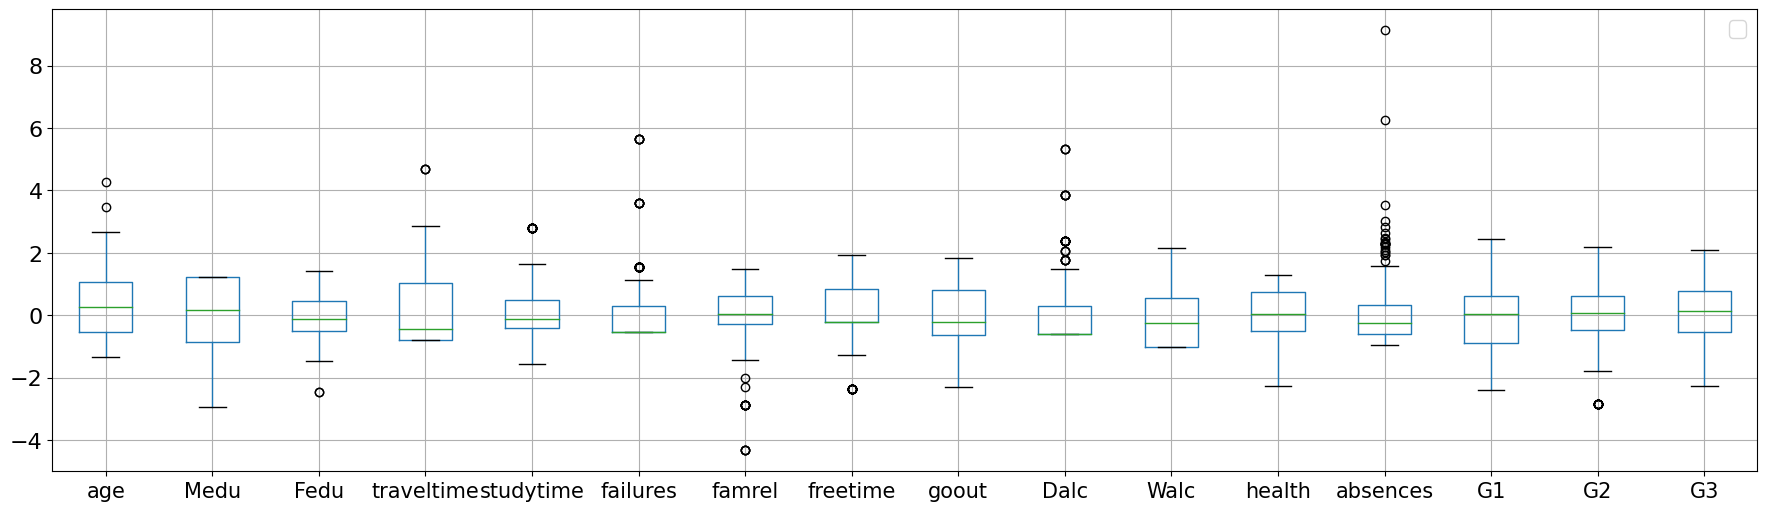

In [ ]:
# **d. Ahora si tenemos un mejor gráfico de los datos**
plt.figure(figsize=(22,6))
Xtrans_scale2.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
print("El Valor máximo y la posición son ",  Gi[Gi==Gi.max()])

El Valor máximo y la posición son  276    10.590523
Name: absences, dtype: float64


#**e. Detectando valores atipicos para la variable "absences" - media y desviación estandard**

In [ ]:
#**e. Detectando valores atipicos para la variable "absences" - media y desviación estandard**
alpha = 0.05
cv = st.t.ppf(1-alpha/2, 6) # Valor crítico de la prueba de Grubbs
print("t_test es cv= {} para n={} observaciones con una significancia de {}".format(cv,len(Xtrans2["absences"]),alpha))
print("La media es =",Xtrans2["absences"].mean())
print("La desviación estándar es =",Xtrans2["absences"].std())
# El Estadistico de Prueba para la prueba Grubbs
G=np.max(abs(Xtrans2["absences"]-Xtrans2["absences"].mean())/Xtrans2["absences"].std())
print("El Estadistico de Prueba para la prueba Grubbs =",G)
Gi=abs(Xtrans2["absences"]-Xtrans2["absences"].mean())/Xtrans2["absences"].std()
print("El Valor máximo y la posición son ",  Gi[Gi==Gi.max()])


t_test es cv= 2.4469118487916806 para n=394 observaciones con una significancia de 0.05
La media es = 5.312182741116751
La desviación estándar es = 5.555521637867212
El Estadistico de Prueba para la prueba Grubbs = 9.123862809459332
El Valor máximo y la posición son  183    9.123863
Name: absences, dtype: float64


# **f. Vamos a eliminar este valor atipico de la Data**

In [ ]:
# **f. Vamos a eliminar este valor atipico de la Data**
Xtrans3=Xtrans.drop([183],axis=0)
Xtrans3

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,3.2,2.4,2.0,2.0,0.2,4.0,3.0,4.0,1.2,1.0,3.0,8.8,5.0,6.0,6.0
1,17.0,1.0,1.0,1.6,2.2,0.0,5.0,3.4,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,15.0,1.0,1.0,1.0,2.0,0.2,4.0,3.0,2.0,1.2,3.0,3.8,7.8,7.0,8.0,10.0
3,15.0,4.0,2.0,1.2,3.0,0.0,3.0,2.0,2.6,1.0,1.0,4.0,3.2,15.0,14.0,15.0
4,16.0,3.0,3.0,1.0,1.6,0.0,3.8,3.0,2.6,1.0,2.0,5.0,9.8,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.8,2.4,1.2,2.0,0.6,4.4,5.0,4.0,4.0,5.0,4.0,8.0,9.0,9.0,9.0
391,17.0,3.0,1.0,2.0,2.0,0.0,2.0,4.0,2.8,1.8,4.0,3.4,3.0,14.0,16.0,16.0
392,21.0,2.8,1.0,1.0,1.0,3.0,4.4,5.0,3.0,3.0,3.0,3.4,10.6,10.0,8.0,7.0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,3.4,2.0,4.0,5.0,0.0,11.0,12.0,10.0


# **g. Gráfico de los datos transformados por la Prueba de Grubbs**

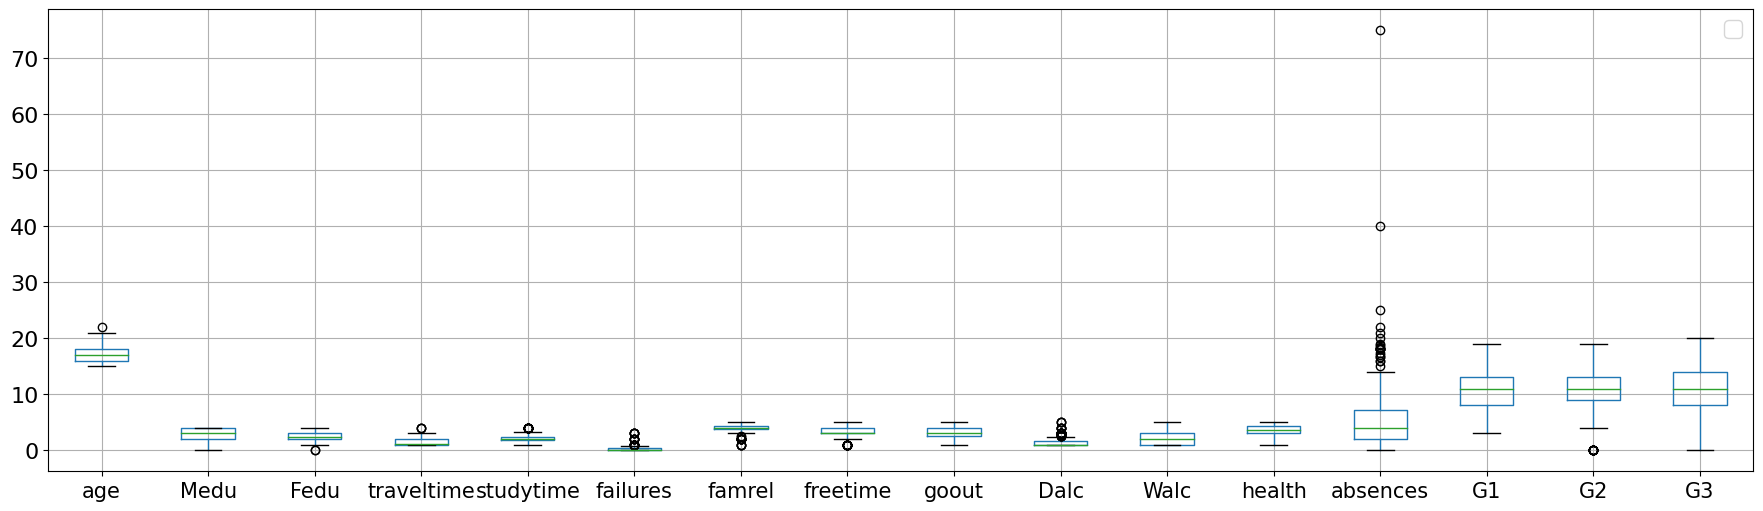

In [ ]:
# **g. Gráfico de los datos transformados por la Prueba de Grubbs**
plt.figure(figsize=(22,6))
Xtrans3.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()